# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [ ]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image
])

batch_size = 64

# Create training set and define training dataloader
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Create test set and define test dataloader
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I have used .toTensor() function to convert PIL image to tensor and .Normalize() to Normalize the image.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [ ]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


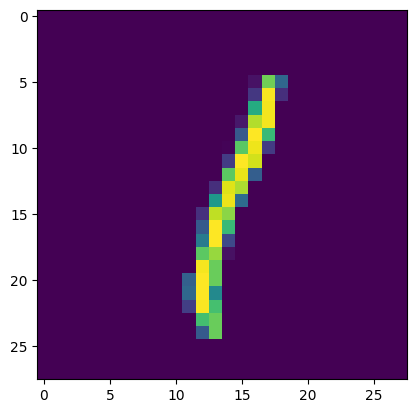

1


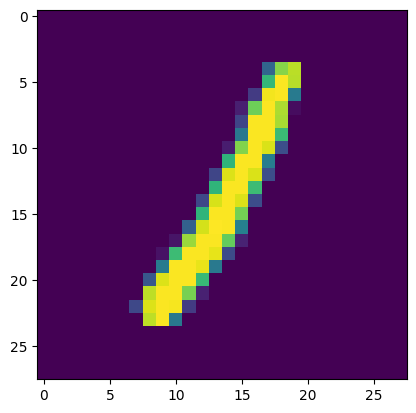

3


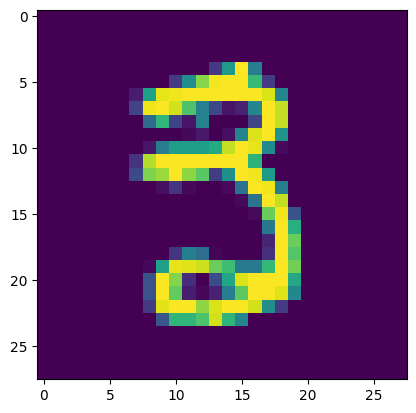

0


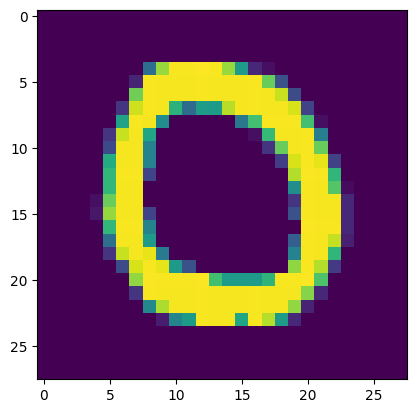

1


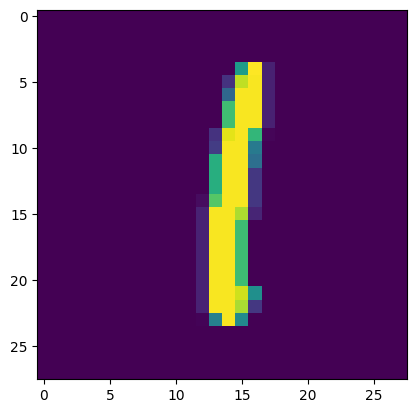

In [ ]:
show5(train_dataloader)

7


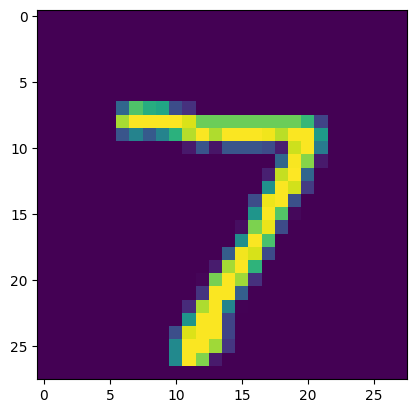

2


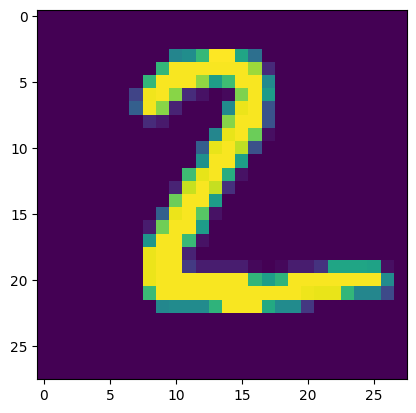

1


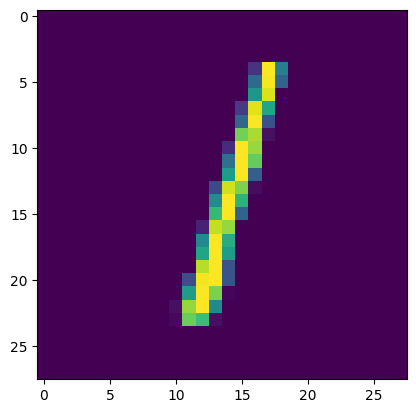

0


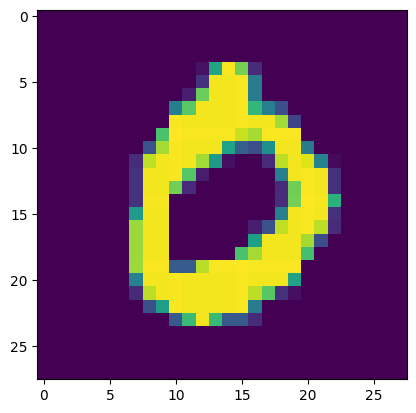

4


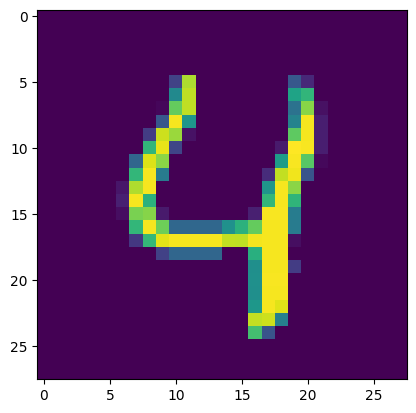

In [ ]:
show5(test_dataloader)

In [ ]:
# Print transformed data information
print("Original data:")
print("Number of samples:", len(train_dataset))
print("Shape of each sample:", train_dataset[0][0].shape)

Original data:
Number of samples: 60000
Shape of each sample: torch.Size([1, 28, 28])


In [ ]:
# Print transformed data information
print("Original data:")
print("Number of samples:", len(test_dataset))
print("Shape of each sample:", test_dataset[0][0].shape)

Original data:
Number of samples: 10000
Shape of each sample: torch.Size([1, 28, 28])


In [ ]:
for images, labels in train_dataloader:
    print("\nBatch information:")
    print("Batch size:", len(images))
    print("Shape of image tensor:", images.shape)
    print("Shape of label tensor:", labels.shape)
    break  # Stop after the first batch for demonstration purposes


Batch information:
Batch size: 64
Shape of image tensor: torch.Size([64, 1, 28, 28])
Shape of label tensor: torch.Size([64])


In [ ]:
for images, labels in test_dataloader:
    print("\nBatch information:")
    print("Batch size:", len(images))
    print("Shape of image tensor:", images.shape)
    print("Shape of label tensor:", labels.shape)
    break  # Stop after the first batch for demonstration purposes


Batch information:
Batch size: 64
Shape of image tensor: torch.Size([64, 1, 28, 28])
Shape of label tensor: torch.Size([64])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [ ]:
# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Create an instance of the neural network
model = NeuralNetwork()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [ ]:
criterion = nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=- 100, reduce=None, reduction='mean', label_smoothing=0.0)
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [ ]:
# Training loop
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    running_loss = 0.0

    for images, labels in train_dataloader:

        images = images.to(device)
        labels = labels.to(device)

        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/30], Loss: 0.3799
Epoch [2/30], Loss: 0.1807
Epoch [3/30], Loss: 0.1322
Epoch [4/30], Loss: 0.1059
Epoch [5/30], Loss: 0.0892
Epoch [6/30], Loss: 0.0801
Epoch [7/30], Loss: 0.0683
Epoch [8/30], Loss: 0.0638
Epoch [9/30], Loss: 0.0571
Epoch [10/30], Loss: 0.0538
Epoch [11/30], Loss: 0.0478
Epoch [12/30], Loss: 0.0463
Epoch [13/30], Loss: 0.0433
Epoch [14/30], Loss: 0.0387
Epoch [15/30], Loss: 0.0355
Epoch [16/30], Loss: 0.0346
Epoch [17/30], Loss: 0.0321
Epoch [18/30], Loss: 0.0298
Epoch [19/30], Loss: 0.0312
Epoch [20/30], Loss: 0.0275
Epoch [21/30], Loss: 0.0279
Epoch [22/30], Loss: 0.0245
Epoch [23/30], Loss: 0.0245
Epoch [24/30], Loss: 0.0217
Epoch [25/30], Loss: 0.0241
Epoch [26/30], Loss: 0.0198
Epoch [27/30], Loss: 0.0209
Epoch [28/30], Loss: 0.0211
Epoch [29/30], Loss: 0.0175
Epoch [30/30], Loss: 0.0208


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
# Evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"\nTest Accuracy: {accuracy:.2%}")


Test Accuracy: 97.64%


## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'trained_model1.pth')